<a href="https://colab.research.google.com/github/dined-io/dyned/blob/main/notebooks/DoorDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Designing a Chair (DINED Ellipse functionality)
In this notebook we will do a simple anthropometric analysis in support of defining basic dimensions of an exam chair. The considered product dimensions are the seat height and the seat depth. The corrresponding relevant body dimensions are lower leg length and sitting depth, respectively.

<img src="assets/ExamChairDimensions.png" alt="Exam Chair Dimensions" style="width: 640px;"/>

The dimensions are derived from a dataset of human body measurements (DINED delstu2016 - https://doi.org/10.4121/uuid:1411a8ac-5944-41d2-81c1-1edf32106d99) by looking at the distribution and correlation of the two body dimension. In this, we will focus on the Dutch population.

## Dataset
We first retrieve the dataset from the 4TU data repository:

In [222]:

!wget -nc -O data.zip https://data.4tu.nl/ndownloader/files/23994179
!unzip -o data.zip delstu2016.csv
!rm data.zip

--2022-03-24 11:39:42--  https://data.4tu.nl/ndownloader/files/23994179
Resolving data.4tu.nl (data.4tu.nl)... 131.180.141.15
Connecting to data.4tu.nl (data.4tu.nl)|131.180.141.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘data.zip’

data.zip                [ <=>                ]  26,38K  --.-KB/s    in 0,02s   

2022-03-24 11:39:42 (1,70 MB/s) - ‘data.zip’ saved [27010]

Archive:  data.zip
  inflating: delstu2016.csv          


We then load the csv file into a dataframe and identify the two names of the two body dimensions we are interested in:

In [223]:
import numpy as np
import pandas as pd

df = pd.read_csv("delstu2016.csv")

buttock_popliteal_depth_name = 'bilknieholtelengte'
popliteal_height_sitting_name = 'Poplitealheightsitting'

Let's now make a scatter plot of both dimensions:

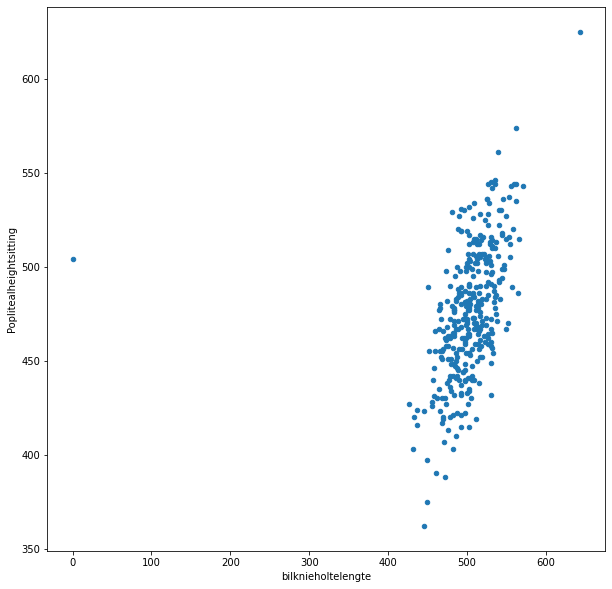

In [224]:
scatter_ax = df.plot.scatter(buttock_popliteal_depth_name , popliteal_height_sitting_name, figsize=(10,10))

In [225]:
percs = np.array([1,5,50,95,99])
df[[buttock_popliteal_depth_name,popliteal_height_sitting_name]].describe(percentiles=0.01*percs)

,bilknieholtelengte,Poplitealheightsitting
count,347.000000,347.000000
mean,502.902017,475.861671
std,38.648433,35.450990
min,0.000000,362.000000
1%,434.840000,393.220000
5%,459.300000,420.000000
50%,503.000000,475.000000
95%,549.700000,534.000000
99%,563.080000,545.540000
max,643.000000,625.000000


We see there are soe far outliers. Let us remove them first:

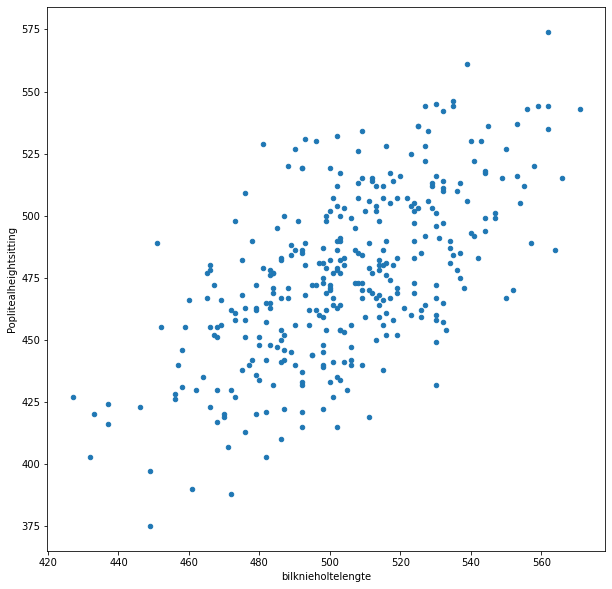

In [226]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[[buttock_popliteal_depth_name,popliteal_height_sitting_name]])) < 3).all(axis=1)]

scatter_ax = df.plot.scatter(buttock_popliteal_depth_name , popliteal_height_sitting_name, figsize=(10,10))


These are the summary statistics for both dimensions:

In [227]:
percs = np.array([1,5,50,95,99])
df[[buttock_popliteal_depth_name,popliteal_height_sitting_name]].describe(percentiles=0.01*percs)

,bilknieholtelengte,Poplitealheightsitting
count,344.000000,344.000000
mean,504.122093,475.677326
std,26.481352,34.099545
min,427.000000,375.000000
1%,437.000000,399.580000
5%,461.150000,420.150000
50%,503.000000,474.500000
95%,548.700000,533.700000
99%,562.000000,544.570000
max,571.000000,574.000000


## XL Chair
Now we are going to look at the Extra Large sized exam chair. The product dimensions (in mm) of this chair are:

In [228]:
m_seat_height = 540
m_seat_depth = 415

Now let us have a look how these seat dimensions compare to our population. We make a scatter plot again and indicate with cross-hairs the product dimmenions.

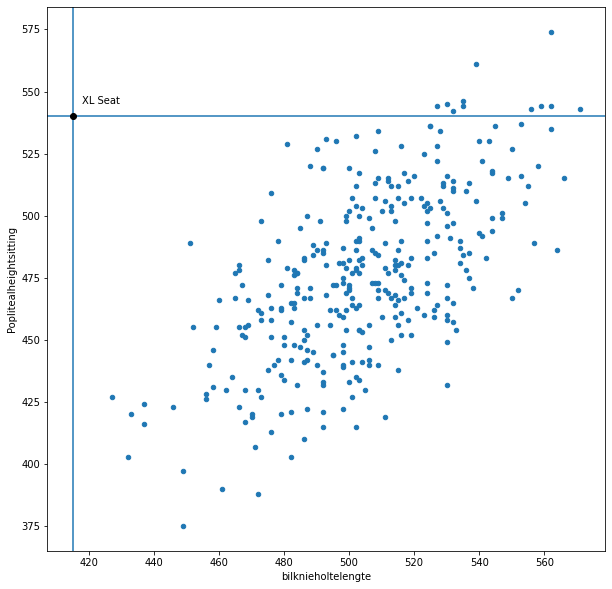

In [229]:
import matplotlib.pyplot as plt
import numpy as np

scatter_ax2 = df.plot.scatter(buttock_popliteal_depth_name , popliteal_height_sitting_name, figsize=(10,10))

scatter_ax2.axhline(y=m_seat_height)
scatter_ax2.axvline(x=m_seat_depth)

p = np.array((m_seat_depth,m_seat_height))
scatter_ax2.annotate("XL Seat",p, xytext=p+(3,5))

scatter_ax2.plot(m_seat_depth,m_seat_height,'o',color="k")

Some observations from this plot:
* For the x-axis, we can see that the seat depth is smaller than the buttock-popliteal depth of all people in our population sample. This does make sense because it is nice to have a bit of room between the front of the seat pan and the knee crease. Typically, we want to have a minimum of 75mm of room. The area at the knee crease is quite sensitive so we want to avoid putting pressure there. That is also why you see that the seat pan of many chairs are curved downwards at the front.
* For the y-axis, we can see that the seat height is quite high compared with people's lower leg length. This also is not a surprise, because of the fact that you have to add a few cm (30mm) for the heel of the shoe. People only fit the chair when they can put their feet on the ground.

From these observations we can pin-point the lower bound on both body dimensions for which we are sure there is still a fit to this chair:

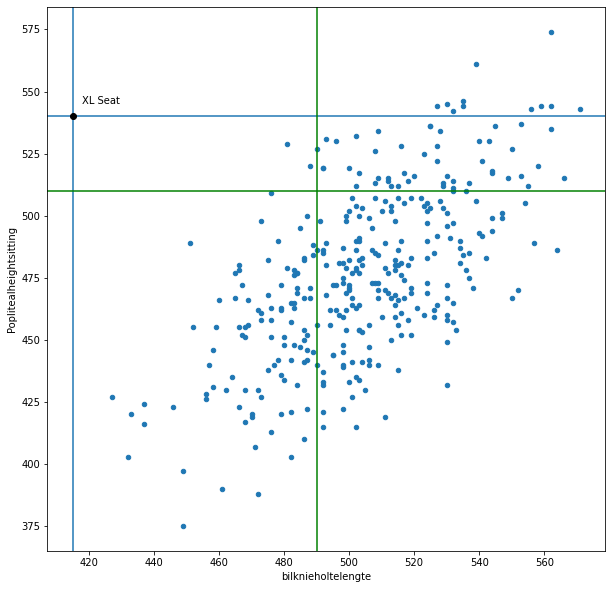

In [230]:
knee_crease_tolerance = 75
shoe_heel_height = 30

lower_bound_popliteal_height_sitting = m_seat_height - shoe_heel_height
lower_bound_buttock_popliteal_depth = m_seat_depth + knee_crease_tolerance

scatter_ax2 = df.plot.scatter(buttock_popliteal_depth_name , popliteal_height_sitting_name, figsize=(10,10))

scatter_ax2.axhline(y=m_seat_height)
scatter_ax2.axvline(x=m_seat_depth)

p = np.array((m_seat_depth,m_seat_height))
scatter_ax2.annotate("XL Seat",p, xytext=p+(3,5))

scatter_ax2.plot(m_seat_depth,m_seat_height,'o',color="k")

scatter_ax2.axhline(y=m_seat_height - shoe_heel_height, color='g')
scatter_ax2.axvline(x=m_seat_depth + knee_crease_tolerance, color='g')

Now let us consider the upper bounds for the two dimensions:
* The easy one is the seat depth. The largest buttock-popliteal depth is 571mm. So this means that this person will have 571mm - 415mm = 156mm of space between the front of the seat pan and the knee crease, which is still fine. Therefore, we can set the upper bound at x=571mm. 
* Regarding the y-axis, i.e. lower leg length, we can observe that there are quite a number of people that are above the green line (lower bound). This means that for those people their lower legs (+ shoe heel) is too large for the seat height and they would sit uncomfortably due to a smaller part of the buttock having to carry the upper body weight. They can however angle their legs a bit forward until their upper legs sit comfortably on the seat pan. We regard any angle, between lower legs and the vertical axis, smaller than 30 degrees as still comfortable. With a seat height of 540mm we can accomodate lower legs, under an angle of 30 degrees, with length: 

In [231]:
upper_bound_buttock_popliteal_depth = df[buttock_popliteal_depth_name].max()
upper_bound_popliteal_height_sitting = int( np.ceil((m_seat_height - shoe_heel_height) / np.cos( np.deg2rad(30) ) ))

print("Upper bound sitting depth (mm):", upper_bound_buttock_popliteal_depth)
print("Upper bound lower leg legnth (mm):", upper_bound_popliteal_height_sitting)

Upper bound sitting depth (mm): 571
Upper bound lower leg legnth (mm): 589


So we can set the upper bound for the lower leg length to y=589.
Now let's draw the upper bounds also on the scatter plot:

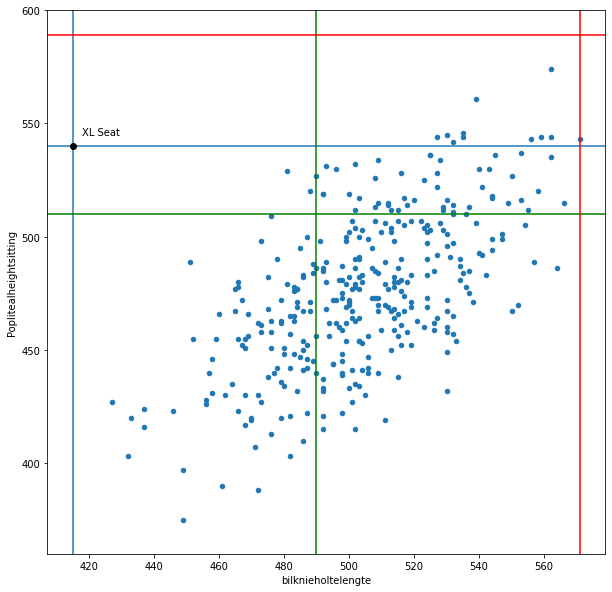

In [232]:
scatter_ax2 = df.plot.scatter(buttock_popliteal_depth_name , popliteal_height_sitting_name, figsize=(10,10))

scatter_ax2.set_ylim(360,600)

scatter_ax2.axhline(y=m_seat_height)
scatter_ax2.axvline(x=m_seat_depth)

p = np.array((m_seat_depth,m_seat_height))
scatter_ax2.annotate("XL Seat",p, xytext=p+(3,5))

scatter_ax2.plot(m_seat_depth,m_seat_height,'o',color="k")

scatter_ax2.axhline(y=m_seat_height - shoe_heel_height, color='g')
scatter_ax2.axvline(x=m_seat_depth + knee_crease_tolerance, color='g')

scatter_ax2.axhline(y=upper_bound_popliteal_height_sitting, color='r')
scatter_ax2.axvline(x=upper_bound_buttock_popliteal_depth, color='r')

Finally, let us more clearly indicate the region of people that would fit for our XL Chair:

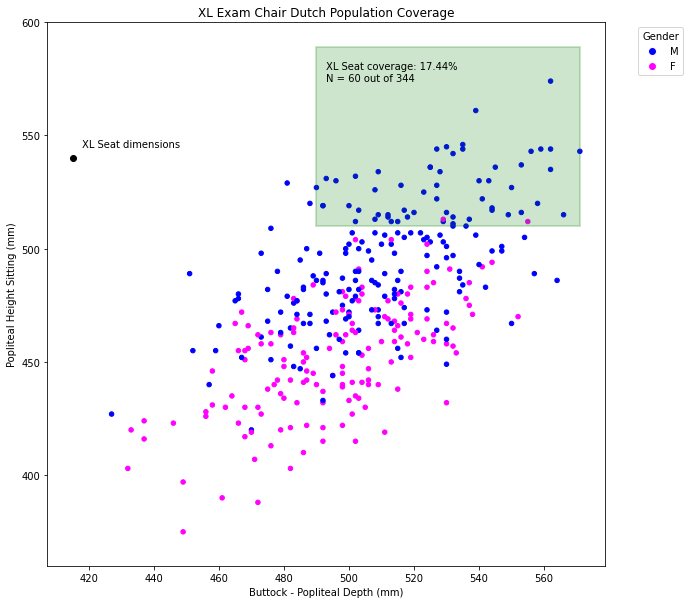

In [233]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

x_range = upper_bound_buttock_popliteal_depth - lower_bound_buttock_popliteal_depth
y_range = upper_bound_popliteal_height_sitting - lower_bound_popliteal_height_sitting

colors = {'M':'blue', 'F':'fuchsia'}

scatter_ax2 = df.plot.scatter(
    buttock_popliteal_depth_name , popliteal_height_sitting_name, 
    color = df.Gender.map( colors ),
    figsize=(10,10))

scatter_ax2.set_ylim(360,600)

scatter_ax2.set_xlabel("Buttock - Popliteal Depth (mm)")
scatter_ax2.set_ylabel("Popliteal Height Sitting (mm)")
scatter_ax2.set_title("XL Exam Chair Dutch Population Coverage")

scatter_ax2.add_patch(Rectangle(
    (lower_bound_buttock_popliteal_depth, lower_bound_popliteal_height_sitting), 
    x_range, y_range,
    color='g',
    fill=True,
    alpha=0.2,
    lw=2)
)

in_XL = (df[buttock_popliteal_depth_name].between( lower_bound_buttock_popliteal_depth , upper_bound_buttock_popliteal_depth)
        & df[popliteal_height_sitting_name].between( lower_bound_popliteal_height_sitting , upper_bound_popliteal_height_sitting))

coverage = np.round((in_XL.sum() / in_XL.count()) * 100.0,decimals=2 )

p = np.array((lower_bound_buttock_popliteal_depth,upper_bound_popliteal_height_sitting))
scatter_ax2.annotate("XL Seat coverage: " + str(coverage) + "%\nN = " + str(in_XL.sum()) + " out of " + str(in_XL.count()) ,p, xytext=p+(3,-15))

p = np.array((m_seat_depth,m_seat_height))
scatter_ax2.annotate("XL Seat dimensions",p, xytext=p+(3,5))
scatter_ax2.plot(m_seat_depth,m_seat_height,'o',color="k")

# gender legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
scatter_ax2.legend(title='Gender', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

